In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta, date
import chardet
import iso3166
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
with open(r"/Users/nandinisridharr/Documents/IIIT - Assignment 1/companies.csv", 'rb') as raw:
    res = chardet.detect(raw.read(66368))
print(res)

{'encoding': 'Windows-1252', 'confidence': 0.728900661539289, 'language': ''}


In [3]:
with open(r"/Users/nandinisridharr/Documents/IIIT - Assignment 1/rounds2.csv", 'rb') as raw:
    res = chardet.detect(raw.read(114949))
print(res)

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


- Using engine='python' when reading both datasets due to special characters present in the company unique ID columns.
- Encoding = 'palmos' is based on Windows-1252 and this seems to decode the data better than ISO-8859-1.

In [4]:
companies=pd.read_csv(r"/Users/nandinisridharr/Documents/IIIT - Assignment 1/companies.csv", encoding='palmos',engine='python')

In [5]:
rounds2 = pd.read_csv(r"/Users/nandinisridharr/Documents/IIIT - Assignment 1/rounds2.csv",encoding='palmos',engine='python')

<h3>Data Exploration</h3>

In [6]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [7]:
companies.head(10)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
5,/Organization/01Games-Technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN
6,/Organization/0Ndine-Biomedical-Inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
7,/Organization/0Xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
8,/Organization/1,One Inc.,http://whatis1.com,Mobile,operating,USA,CA,SF Bay Area,San Francisco,01-08-2011
9,/Organization/1-2-3-Listo,"1,2,3 Listo",http://www.123listo.com,E-Commerce,operating,CHL,12,Santiago,Las Condes,01-01-2012


Company name seems to be the last string part of permalink. So NULL value in 'name' can be imputed by extracting it from 'permalink'.

In [8]:
companies.loc[companies['name'].isnull(),['permalink','name']] = 'Tell It In'

In [9]:
#Dropping unnecessary columns
companies = companies[['permalink', 'name', 'category_list', 'status','country_code']]

In [10]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [11]:
rounds2.head(10)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
5,/ORGANIZATION/004-TECHNOLOGIES,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0
7,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0
9,/ORGANIZATION/0XDATA,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.0


In [12]:
#Checking NULL % of 'funding_round_code' column:
(len(rounds2[rounds2['funding_round_code'].isnull()])/len(rounds2))*100

72.90972518247223

In [13]:
#NULL % is approximately 73% which is too high and therefore this column is being dropped:
rounds2=rounds2[['company_permalink', 'funding_round_permalink','funding_round_type','raised_amount_usd']]

Converting unique id columns in both datasets to lower case so that they are identical and the merge is done correctly later

In [14]:
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()
companies['permalink'] = companies['permalink'].str.lower()

<h2>Table 1.1</h2>

#### Unique companies present in rounds2

In [15]:
print(len(rounds2['company_permalink'].unique()))

66368


#### Unique companies present in companies

In [16]:
print(len(companies['permalink'].unique()))

66368


#### Companies in the rounds2 file which are not  present in companies

In [17]:
rounds2.loc[~(rounds2['company_permalink'].isin(companies['permalink'])), 'company_permalink']

98692    /organization/tell-it-in
Name: company_permalink, dtype: object

In [18]:
companies.loc[~(companies['permalink'].isin(rounds2['company_permalink'])),'permalink'] = '/organization/tell-it-in'

<h2>Table 2.1</h2>

There are NULLs in 'raised_amount_usd' column. Based on 'funding_round_type' category, checking percentage of NULLs for categories venture, seed, angel and private equity and imputing the representative value if NULL% is low (lesser than 25%), otherwise removing those rows.

Percentage of NULLs < 10% so values can be imputed with representative value. To decide whether representative value is mean or median, check with descriptive stats

<b>Venture</b>

In [19]:
(len(rounds2[(rounds2['funding_round_type']=='venture')&(rounds2['raised_amount_usd'].isnull())])/len(rounds2[rounds2['funding_round_type']=='venture']))*100

9.489314160089378

In [20]:
(rounds2.loc[rounds2['funding_round_type']=='venture','raised_amount_usd']/1000000).describe()

count    50228.000000
mean        11.748949
std         86.352067
min          0.000000
25%          1.600902
50%          5.000000
75%         12.000000
max      17600.000000
Name: raised_amount_usd, dtype: float64

Median is a better representative value as the data contains outliers as shown by the boxplot.

In [21]:
rounds2.loc[(rounds2['funding_round_type']=='venture')&(rounds2['raised_amount_usd'].isnull()),'raised_amount_usd']=rounds2.loc[rounds2['funding_round_type']=='venture','raised_amount_usd'].describe()['50%']

In [22]:
'Median (representative value) for Venture funding type is '+str(rounds2.loc[rounds2['funding_round_type']=='venture','raised_amount_usd'].describe()['50%']/1000000)+' Million USD'

'Median (representative value) for Venture funding type is 5.0 Million USD'

In [23]:
assert len(rounds2[(rounds2['funding_round_type']=='venture')&(rounds2['raised_amount_usd'].isnull())])==0

<b>Angel</b>

In [24]:
(len(rounds2[(rounds2['funding_round_type']=='angel')&(rounds2['raised_amount_usd'].isnull())])/len(rounds2[rounds2['funding_round_type']=='angel']))*100

20.24942566458812

In [25]:
(rounds2.loc[rounds2['funding_round_type']=='angel','raised_amount_usd']/1000000).describe()

count    4860.000000
mean        0.958694
std         7.404397
min         0.000000
25%         0.150000
50%         0.400000
75%         1.000000
max       494.511992
Name: raised_amount_usd, dtype: float64

In [26]:
rounds2.loc[(rounds2['funding_round_type']=='angel')&(rounds2['raised_amount_usd'].isnull()),'raised_amount_usd']=rounds2.loc[rounds2['funding_round_type']=='angel','raised_amount_usd'].describe()['50%']

In [27]:
assert len(rounds2[(rounds2['funding_round_type']=='angel')&(rounds2['raised_amount_usd'].isnull())])==0

In [28]:
'Median (representative value) for Angel funding type is '+str(rounds2.loc[rounds2['funding_round_type']=='angel','raised_amount_usd'].describe()['50%']/1000000)+' Million USD'

'Median (representative value) for Angel funding type is 0.4 Million USD'

<b>Seed</b>

In [29]:
(len(rounds2[(rounds2['funding_round_type']=='seed')&(rounds2['raised_amount_usd'].isnull())])/len(rounds2[rounds2['funding_round_type']=='seed']))*100

22.67396147293933

In [30]:
(rounds2.loc[rounds2['funding_round_type']=='seed','raised_amount_usd']/1000000).describe()

count    23603.000000
mean         0.719818
std          2.221733
min          0.000000
25%          0.055000
50%          0.275000
75%          1.000000
max        200.000000
Name: raised_amount_usd, dtype: float64

In [31]:
rounds2.loc[(rounds2['funding_round_type']=='seed')&(rounds2['raised_amount_usd'].isnull()),'raised_amount_usd']=rounds2.loc[rounds2['funding_round_type']=='seed','raised_amount_usd'].describe()['50%']

In [32]:
assert len(rounds2[(rounds2['funding_round_type']=='seed')&(rounds2['raised_amount_usd'].isnull())])==0

In [33]:
'Median (representative value) for Seed funding type is '+str(rounds2.loc[rounds2['funding_round_type']=='seed','raised_amount_usd'].describe()['50%']/1000000)+' Million USD'

'Median (representative value) for Seed funding type is 0.275 Million USD'

<b>Private Equity</b>

In [34]:
(len(rounds2[(rounds2['funding_round_type']=='private_equity')&(rounds2['raised_amount_usd'].isnull())])/len(rounds2[rounds2['funding_round_type']=='private_equity']))*100

15.273522975929978

In [35]:
(rounds2.loc[rounds2['funding_round_type']=='private_equity','raised_amount_usd']/1000000).describe()

count    1936.000000
mean       73.308593
std       198.113458
min         0.000000
25%         5.000000
50%        20.000000
75%        75.000000
max      4745.460219
Name: raised_amount_usd, dtype: float64

In [36]:
rounds2.loc[(rounds2['funding_round_type']=='private_equity')&(rounds2['raised_amount_usd'].isnull()),'raised_amount_usd']=rounds2.loc[rounds2['funding_round_type']=='private_equity','raised_amount_usd'].describe()['50%']

In [37]:
assert len(rounds2[(rounds2['funding_round_type']=='private_equity')&(rounds2['raised_amount_usd'].isnull())])==0

In [38]:
'Median (representative value) for Private Equity funding type is '+str(rounds2.loc[rounds2['funding_round_type']=='private_equity','raised_amount_usd'].describe()['50%']/1000000)+' Million USD'

'Median (representative value) for Private Equity funding type is 20.0 Million USD'

<b>Note: Handling Outliers</b> <br>
As shown above, there are outliers in the 'raised_amount_usd' column leading to median being the representative value. Since Sparks Fund wants to invest where others are investing, their decision is based on the amount of confidence others have. Thus, larger investments, i.e., outlier values, show higher confidence and therefore outliers are not being removed. 

<h3>Suggested Funding Type:</h3> <br>
The median value of Angel and Seed funding types are below 1 Million USD and therefore this investment type is too small for Sparks Fund The median value of Private equity type is 20 Million which is too large of an investment. So <b>venture</b> type with a median value of 5 Million falls within the desired investment amount range of 5-15 Million. 50-82% of companies invest 5-15 Million (as shown by the calculation)

In [39]:
np.quantile((rounds2.loc[rounds2['funding_round_type']=='venture','raised_amount_usd']/1000000),0.82)

15.0

<h2>Table 3.1</h2>

Using iso3166 library, getting country names based on country codes. This is done to easily identify English soeaking countries.

In [40]:
def get_country_name(x):
    try:
        return iso3166.countries_by_alpha3[x][0]
    except KeyError:
        return np.nan

In [41]:
companies['Country Name'] = companies['country_code'].apply(get_country_name)

Created an excel sheet containing a consolidated table of all tables in the suggested wikipedia site: https://en.wikipedia.org/wiki/List_of_countries_and_territories_where_English_is_an_official_language

In [42]:
lang = pd.read_excel(r"/Users/nandinisridharr/Documents/IIIT - Assignment 1/Language.xlsx")

In [43]:
companies['English_speaking']=np.where((companies['Country Name'].isin(lang['Country']))|(companies['country_code'].isin(lang['Alpha-3 code'])),'Yes','No')

#### Merging both datasets

- Merging on permalink column as it is the unique id for companies
- Renaming column name permalink to company_permalink in companies dataset before merging

In [44]:
companies.rename(columns = {'permalink':'company_permalink'},inplace=True)

In [45]:
len(companies[companies.duplicated('company_permalink',keep=False)])

0

- There are no duplicates in the 'company_permalink' column in companies data. Therefore we need not worry about a cross-join being creeated and can directly merge this with rounds2 data. The expected length of the merged dataset is the same as the length of rounds2 data.

In [46]:
master_frame = pd.merge(rounds2, companies, on = 'company_permalink', how='left')

In [47]:
assert len(rounds2)==len(master_frame)

Keeping only rows where funding type is venture and country is English speaking, based on constraints applied by Sparks Fund.

In [48]:
master_frame = master_frame[(master_frame['funding_round_type']=='venture')&(master_frame['English_speaking']=='Yes')].reset_index(drop=True)

There are some companies with 'rraised_amount_usd' = 0, indicating an investment of 0 USD which is no investment at all. Therefore these will be removed at this point to calculate total number of investments.

In [49]:
master_frame=master_frame[master_frame['raised_amount_usd']!=0].reset_index(drop=True)

Creating a pivoted dataframe based on Country to check which country has maximum investment. Here, checking the total sum of investments rather than number as sum would be a better value to check top country.

In [50]:
piv=pd.pivot_table(data=master_frame,index='Country Name',values='raised_amount_usd',aggfunc='sum')

In [51]:
piv=piv.sort_values(by='raised_amount_usd',ascending=False)
piv=piv.reset_index()
piv

,Country Name,raised_amount_usd
0,United States of America,4.336758e+11
1,United Kingdom of Great Britain and Northern I...,2.148563e+10
2,India,1.523186e+10
3,Canada,1.003333e+10
4,Israel,7.477515e+09
5,Singapore,3.128918e+09
6,Ireland,1.931131e+09
7,Australia,1.412935e+09
8,Malaysia,9.130588e+08
9,Hong Kong,8.762670e+08


In [52]:
top9 = piv.loc[:8]

In [53]:
top9[:3]

,Country Name,raised_amount_usd
0,United States of America,4.336758e+11
1,United Kingdom of Great Britain and Northern I...,2.148563e+10
2,India,1.523186e+10


<h2>Table-5.1</h2>

In [54]:
mapping = pd.read_csv(r"/Users/nandinisridharr/Documents/IIIT - Assignment 1/mapping.csv")

In [55]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   category_list                            687 non-null    object
 1   Automotive & Sports                      688 non-null    int64 
 2   Blanks                                   688 non-null    int64 
 3   Cleantech / Semiconductors               688 non-null    int64 
 4   Entertainment                            688 non-null    int64 
 5   Health                                   688 non-null    int64 
 6   Manufacturing                            688 non-null    int64 
 7   News, Search and Messaging               688 non-null    int64 
 8   Others                                   688 non-null    int64 
 9   Social, Finance, Analytics, Advertising  688 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 53.9+ KB


In [56]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


- Drop rows where Blanks = 1 as these rows do not contain any valuable data. 
- Dropping Blanks column after that as it is no longer required.

In [57]:
mapping = mapping[mapping['Blanks']==0].reset_index(drop=True)
mapping = mapping.drop('Blanks',axis=1)

Fetching only primary sector:

In [58]:
master_frame['category_list']=master_frame['category_list'].fillna('')
master_frame['category_list']=master_frame['category_list'].apply(lambda x:x.split('|')[0])

Checking if every category belongs to only one sector:

In [59]:
mapping.sum(axis=1).unique()

array([1])

Exploring 'category_list' column:

In [60]:
mapping['category_list'].unique()

array(['3D', '3D Printing', '3D Technology', 'Accounting',
       'Active Lifestyle', 'Ad Targeting', 'Advanced Materials',
       'Adventure Travel', 'Advertising', 'Advertising Exchanges',
       'Advertising Networks', 'Advertising Platforms', 'Advice',
       'Aerospace', 'Agriculture', 'Air Pollution Control', 'Algorithms',
       'All Markets', 'All Students', 'Alter0tive Medicine', 'Alumni',
       'A0lytics', 'Android', 'Angels', 'Animal Feed',
       'Anything Capital Intensive', 'App Discovery', 'App Marketing',
       'App Stores', 'Application Performance Monitoring',
       'Application Platforms', 'Apps', 'Aquaculture', 'Architecture',
       'Archiving', 'Art', 'Artificial Intelligence', 'Artists Globally',
       'Assisitive Technology', 'Assisted Living', 'Auctions', 'Audio',
       'Audiobooks', 'Augmented Reality', 'Auto', 'Automated Kiosk',
       'Automotive', 'B2B', 'B2B Express Delivery', 'Babies',
       'Baby Accessories', 'Baby Boomers', 'Baby Safety', 'Bankin

category_list columns contains 0 in place of 'na':

In [61]:
mapping['category_list']=mapping['category_list'].str.replace('0','na')

Creating Sector column, containing sector name, based on main sector columns:

In [62]:
mapping['Sector']=''
for i in mapping.columns:
    mapping['Sector']=np.where(mapping[i]==1,i,mapping['Sector'])

Making sure category_list column does not have same issue as mapping's category_list column

In [63]:
master_frame.loc[master_frame['category_list'].str.contains('0'),'category_list'].unique()

array(['Enterprise 2.0'], dtype=object)

In [64]:
len_masf = len(master_frame)
master_frame=pd.merge(master_frame,mapping[['category_list','Sector']],on='category_list',how='left')
assert len_masf == len(master_frame)

Checking percentage of NULLs in Sector column:

In [65]:
(len(master_frame[master_frame['Sector'].isnull()])/len(master_frame))*100

2.413534148274855

Since NULL% is only around 2.4%, these rows can be just be filled in with '', without hindering the sector analysis. But these are being dropped only when we analyse number of investments, to err on the side of caution.

In [66]:
master_frame['Sector']=master_frame['Sector'].fillna('')
pd.value_counts(master_frame['Sector'])

Others                                     10997
Social, Finance, Analytics, Advertising     9668
Cleantech / Semiconductors                  9634
News, Search and Messaging                  5869
Health                                      3972
Manufacturing                               3282
Entertainment                               2602
                                            1157
Automotive & Sports                          757
Name: Sector, dtype: int64

In [67]:
D1 = master_frame[master_frame['Country Name']=='United States of America'].reset_index(drop=True)
D2 = master_frame[master_frame['Country Name']=='United Kingdom of Great Britain and Northern Ireland'].reset_index(drop=True)
D3 = master_frame[master_frame['Country Name']=='India'].reset_index(drop=True)

Keeping only required columns:

In [68]:
D1 = D1[['company_permalink','name','category_list','raised_amount_usd','Country Name','Sector']]
D2 = D2[['company_permalink','name','category_list','raised_amount_usd','Country Name','Sector']]
D3 = D3[['company_permalink','name','category_list','raised_amount_usd','Country Name','Sector']]

Taking pivoted data of D1,D2,D3 as some companies have been invested in more than once resulting in duplicate entries. Taking the total sum of investments should suffice for the analysis as the total sum also indicates the confidence in the company.

In [69]:
D1=pd.pivot_table(data=D1,index=['company_permalink','name','category_list','Country Name','Sector'],values='raised_amount_usd',aggfunc='sum')
D1=D1.reset_index()

In [70]:
D2=pd.pivot_table(data=D2,index=['company_permalink','name','category_list','Country Name','Sector'],values='raised_amount_usd',aggfunc='sum')
D2=D2.reset_index()

In [71]:
D3=pd.pivot_table(data=D3,index=['company_permalink','name','category_list','Country Name','Sector'],values='raised_amount_usd',aggfunc='sum')
D3=D3.reset_index()

<b>Total no. of investments</b>

In [72]:
len(D1)

20483

In [73]:
len(D2)

1548

In [74]:
len(D3)

684

<b>Total Amt Invested</b>

In [75]:
D1['raised_amount_usd'].sum()

433675842796.0

In [76]:
D2['raised_amount_usd'].sum()

21485627416.0

In [77]:
D3['raised_amount_usd'].sum()

15231858718.0

<b>Top, Second, Third Sector - No. of Investments</b>

In [78]:
pd.value_counts(D1['Sector'])

Others                                     4883
Social, Finance, Analytics, Advertising    4055
Cleantech / Semiconductors                 3870
News, Search and Messaging                 2439
Health                                     1903
Manufacturing                              1482
Entertainment                              1127
                                            381
Automotive & Sports                         343
Name: Sector, dtype: int64

In [79]:
pd.value_counts(D2['Sector'])

Others                                     387
Social, Finance, Analytics, Advertising    313
Cleantech / Semiconductors                 290
News, Search and Messaging                 185
Entertainment                              121
Manufacturing                               95
Health                                      86
                                            41
Automotive & Sports                         30
Name: Sector, dtype: int64

In [80]:
pd.value_counts(D3['Sector'])

Others                                     221
Social, Finance, Analytics, Advertising    141
News, Search and Messaging                 108
Entertainment                               52
Manufacturing                               48
Cleantech / Semiconductors                  46
Health                                      42
Automotive & Sports                         18
                                             8
Name: Sector, dtype: int64

<b>Company that receieved highest investment in the Top Sector</b>

In [81]:
D1.loc[D1['raised_amount_usd']==D1.loc[D1['Sector']=='Others','raised_amount_usd'].max(),'name']

16531    SoFi
Name: name, dtype: object

In [82]:
D2.loc[D2['raised_amount_usd']==D2.loc[D2['Sector']=='Others','raised_amount_usd'].max(),'name']

960    OneWeb
Name: name, dtype: object

In [83]:
D3.loc[D3['raised_amount_usd']==D3.loc[D3['Sector']=='Others','raised_amount_usd'].max(),'name']

196    Flipkart
Name: name, dtype: object

<b>Company that receieved highest investment in the Second Sector</b>

In [84]:
D1.loc[D1['raised_amount_usd']==D1.loc[D1['Sector']=='Social, Finance, Analytics, Advertising','raised_amount_usd'].max(),'name']

10824    MediaVast
Name: name, dtype: object

In [85]:
D2.loc[D2['raised_amount_usd']==D2.loc[D2['Sector']=='Social, Finance, Analytics, Advertising','raised_amount_usd'].max(),'name']

1069    Powa Technologies
Name: name, dtype: object

In [86]:
D3.loc[D3['raised_amount_usd']==D3.loc[D3['Sector']=='Social, Finance, Analytics, Advertising','raised_amount_usd'].max(),'name']

527    ShopClues.com
Name: name, dtype: object

## Checkpoint 6 - Plots

### Plot 1 - Representative value

In [87]:
p1 = rounds2.loc[(rounds2['funding_round_type'].isin(['venture','seed','angel','private_equity']))&(rounds2['raised_amount_usd']!=0),['funding_round_type','raised_amount_usd']].reset_index(drop=True)

In [88]:
#Converting raised_amount_usd column to millions (to make scale more interpretable):
p1['raised_amount_usd']=p1['raised_amount_usd']/1000000

In [89]:
#Removing large values to make plot more interpretable (Have chosen value 75 million as it most investments across all categories fall within this value):
p1=p1[p1['raised_amount_usd']<=75].reset_index(drop=True)

/Users/nandinisridharr/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


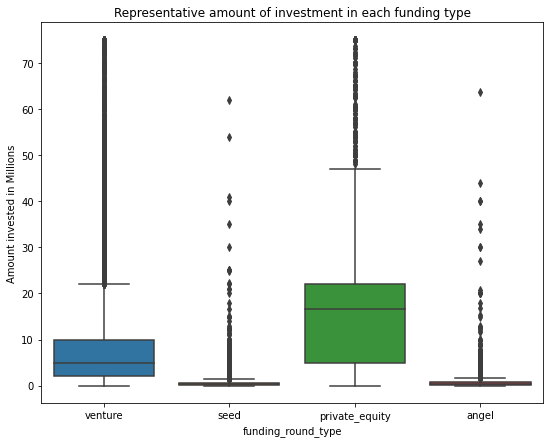

In [90]:
plt.figure(figsize=[9,7])
sns.boxplot(p1['funding_round_type'],p1['raised_amount_usd'])
plt.title('Representative amount of investment in each funding type')
plt.ylabel('Amount invested in Millions')
plt.show()

## Plot 2 - Top 3 countries

In [91]:
p9=top9.copy()

#Converting raised_amount_usd column to millions (to make scale more interpretable):
p9['raised_amount_usd']=p9['raised_amount_usd']/1000000

#Making country names shorter (to make plot more interpretable):
p9.loc[p9['Country Name']=='United States of America','Country Name'] = 'USA'
p9.loc[p9['Country Name']=='United Kingdom of Great Britain and Northern Ireland','Country Name'] = 'UK'

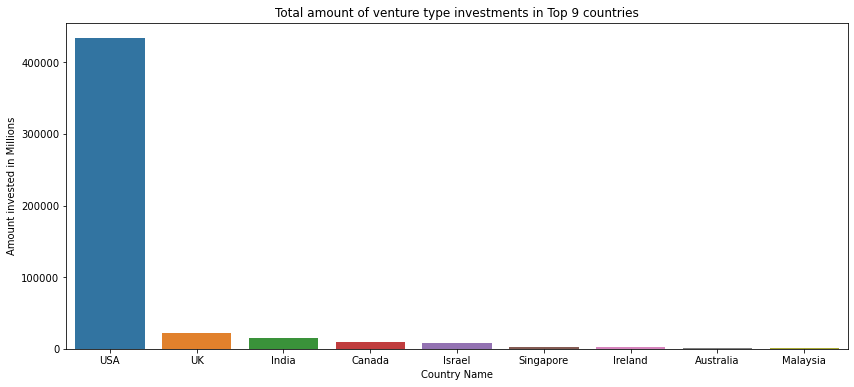

In [92]:
plt.figure(figsize=[14,6])
sns.barplot(data=p9,x='Country Name',y='raised_amount_usd')
plt.title('Total amount of venture type investments in Top 9 countries')
plt.ylabel('Amount invested in Millions')
plt.show()

## Plot 3 - Top 3 sectors in top 3 countries

In [93]:
D = D1[['Country Name','Sector']].append(D2[['Country Name','Sector']],ignore_index=True)
D = D.append(D3[['Country Name','Sector']],ignore_index=True)

In [94]:
#Removing blank Sector values for interpretation:
D=D[D['Sector']!=''].reset_index(drop=True)

In [95]:
#Changing country name:
D.loc[D['Country Name']=='United States of America','Country Name'] = 'USA'
D.loc[D['Country Name']=='United Kingdom of Great Britain and Northern Ireland','Country Name'] = 'UK'

In [96]:
#To get count of each sector based on country (in pivot table):
D['Count']=1

In [97]:
p3=pd.pivot_table(D,index='Country Name',columns='Sector',values='Count',aggfunc='sum')

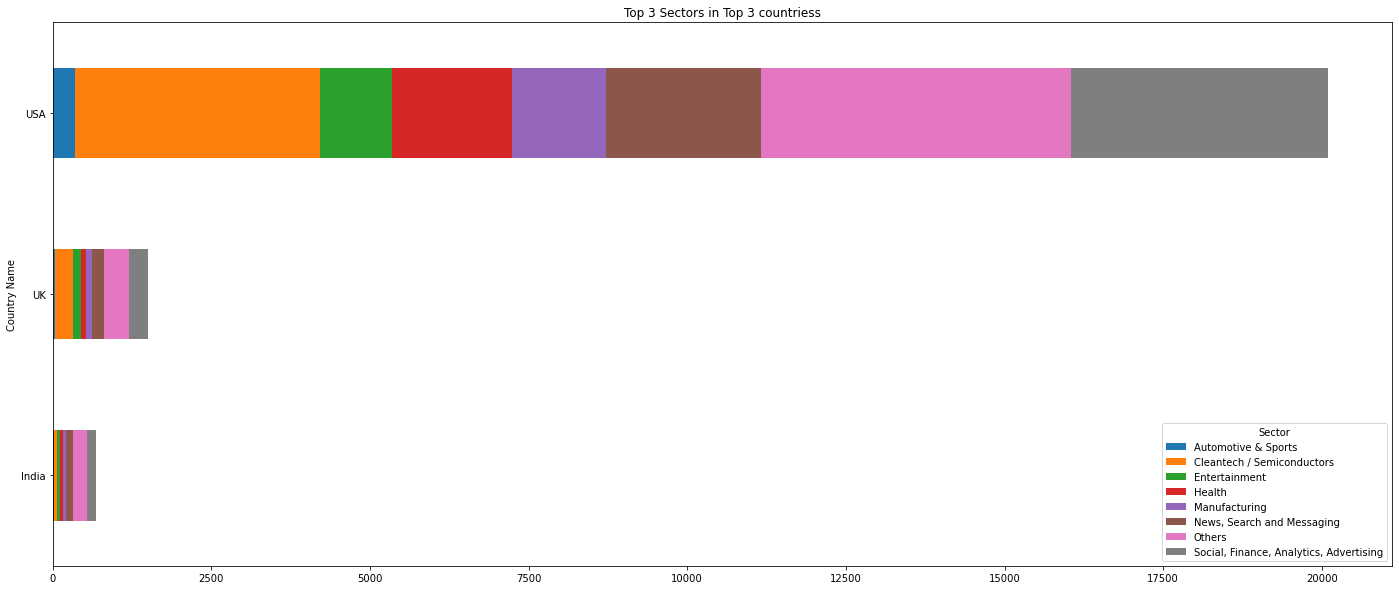

In [98]:
p3.plot(kind='barh',stacked=True,figsize=[24,10])
plt.title('Top 3 Sectors in Top 3 countriess')
plt.show()